<a href="https://colab.research.google.com/github/Valtern/PCVK_Ganjil_2025/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practicum

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

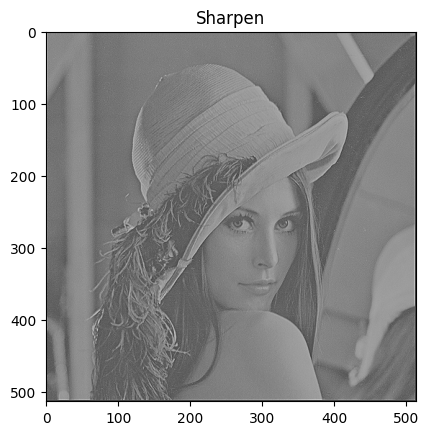

In [5]:
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    padded_image = np.pad(image, ((padding, padding), (padding, padding)), 'constant')

    output_height = (image_height - kernel_height + 2 * padding) // stride + 1
    output_width = (image_width - kernel_width + 2 * padding) // stride + 1

    output = np.zeros((output_height, output_width))

    for y in range(output_height):
        for x in range(output_width):
            y_start = y * stride
            x_start = x * stride
            y_end = y_start + kernel_height
            x_end = x_start + kernel_width
            image_patch = padded_image[y_start:y_end, x_start:x_end]
            output[y, x] = (image_patch * kernel).sum()
    return output

img = cv.imread('/content/drive/MyDrive/PCVK/Image/Lenna_(test_image).png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

convoluted_image = convolution2d(img_gray, kernel_sharpen, stride=1, padding=2)


plt.imshow(convoluted_image, cmap='gray')
plt.title("Sharpen")
plt.show()



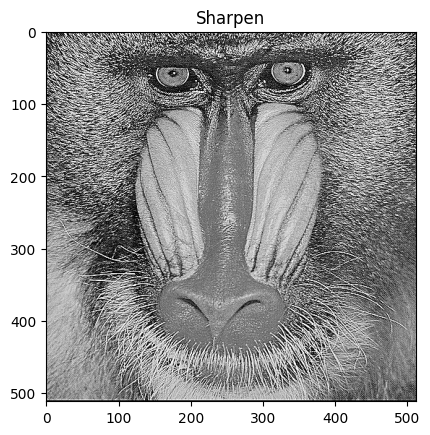

In [8]:
img1 = cv.imread('/content/drive/MyDrive/PCVK/Image/mandrill.tiff')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

sharpen_kernel = np.array([[0, -1, 0],
                           [-1,  5, -1],
                           [0, -1, 0]])

convoluted_image1 = cv.filter2D(img1, -1, sharpen_kernel)

plt.imshow(convoluted_image1, cmap='gray')
plt.title("Sharpen")
plt.show()

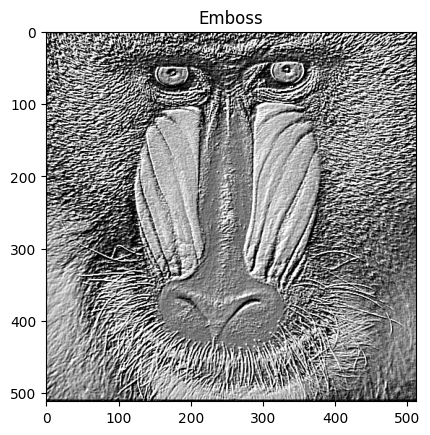

In [11]:
img2 = cv.imread('/content/drive/MyDrive/PCVK/Image/mandrill.tiff')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

emboss_kernel = np.array([[-2, -1, 0],
                           [-1,  1, 1],
                           [0, 1, 2]])

convoluted_image2 = cv.filter2D(img2, -1, emboss_kernel)

plt.imshow(convoluted_image2, cmap='gray')
plt.title("Emboss")
plt.show()

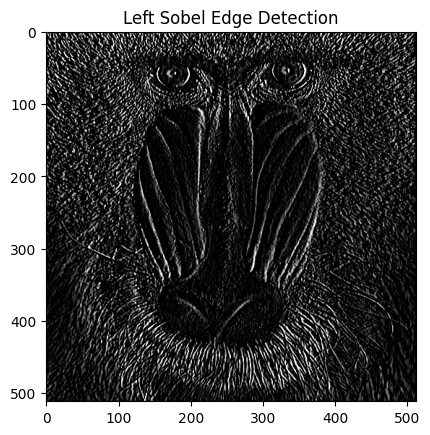

In [13]:
img3 = cv.imread('/content/drive/MyDrive/PCVK/Image/mandrill.tiff')
img3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

leftsobeledgedetect = np.array([[1, 0, -1],
                           [2,  0, -2],
                           [1, 0, -1]])

convoluted_image3 = cv.filter2D(img3, -1, leftsobeledgedetect)

plt.imshow(convoluted_image3, cmap='gray')
plt.title("Left Sobel Edge Detection")
plt.show()

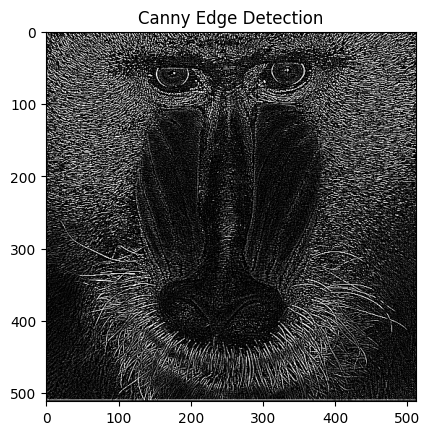

In [15]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/Image/mandrill.tiff')
img4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

cannyedgedetection_kernel = np.array([[-1, -1, -1],
                                      [-1,  8, -1],
                                      [-1, -1, -1]])

convoluted_image4 = cv.filter2D(img4, -1, cannyedgedetection_kernel)

plt.imshow(convoluted_image4, cmap='gray')
plt.title("Canny Edge Detection")
plt.show()

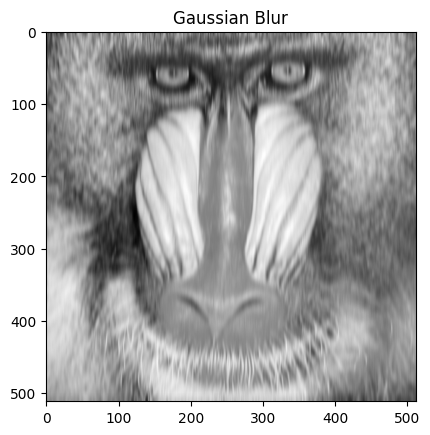

In [17]:
img5 = cv.imread('/content/drive/MyDrive/PCVK/Image/mandrill.tiff')
img5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

sigma = math.sqrt(21)
gaussian_kernel = cv.getGaussianKernel(21, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

convoluted_image5 = cv.filter2D(img5, -1, gaussian_kernel)

plt.imshow(convoluted_image5, cmap='gray')
plt.title("Gaussian Blur")
plt.show()

# EXPERIMENT

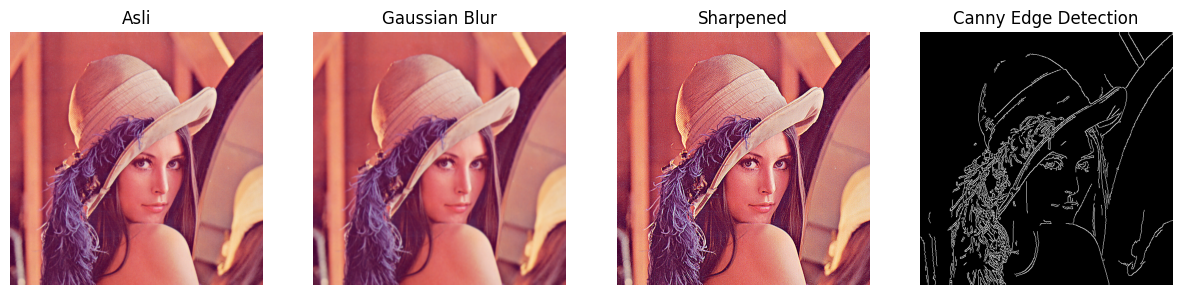

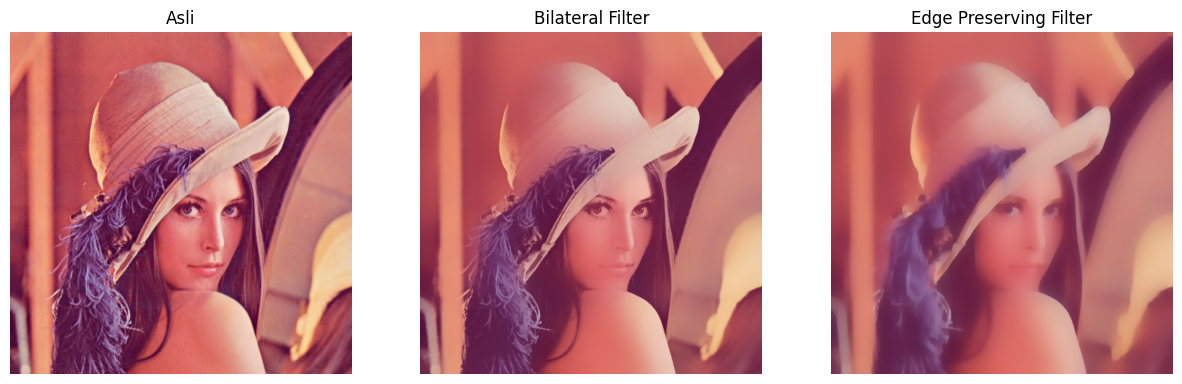

In [20]:
# Fungsi tampil berdampingan
def show_side_by_side(images, titles, figsize=(15,5)):
  plt.figure(figsize=figsize)
  for i, (img, title) in enumerate (zip(images, titles)):
    if len(img.shape) == 2: # grayscale
      plt.subplot(1, len(images), i+1)
      plt.imshow(img, cmap="gray")
    else: # color
      plt.subplot(1, len(images), i+1)
      plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
  plt.show()

img = cv.imread("/content/drive/MyDrive/PCVK/Image/Lenna_(test_image).png")
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(img, (7,7), 1)
edges = cv.Canny(cv.cvtColor(img, cv.COLOR_BGR2GRAY), 100, 200)
sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
sharpened = cv.filter2D(img, -1, sharpen_kernel)
show_side_by_side([img, blur, sharpened, edges],
["Asli", "Gaussian Blur", "Sharpened", "Canny Edge Detection"])

#Filter Modern dari OpenCV
# Bilateral Filter (edge-preserving)
bilateral = cv.bilateralFilter (img, 50, 100, 100)
# Edge Preserving Filter (alternatif Guided Filter)
edge_preserve = cv.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9)
show_side_by_side([img, bilateral, edge_preserve],
["Asli", "Bilateral Filter", "Edge Preserving Filter"])

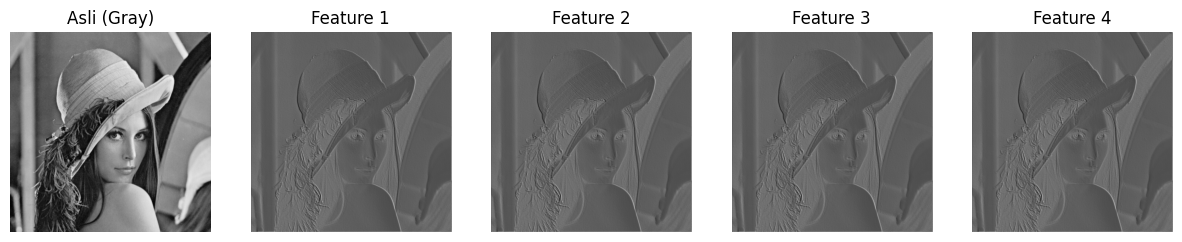

In [36]:
#Filter Feature Map yang digunakan pada CNN, Lakukan running code bagian ini beberapa kali dan perhatikan hasilnya
import torch
import torch.nn as nn

img = cv.imread("/content/drive/MyDrive/PCVK/Image/Lenna_(test_image).png")
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)

  def forward(self, x):
     return self.conv1(x)


model = SimpleCNN()
#Ubah gambar ke tensor
img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze (0).unsqueeze (0) / 255.0
#Hasil CNN
with torch.no_grad():
  features = model(img_tensor)
#Visualisasi feature maps
feature_maps = [features [0,1].numpy() for i in range(features.shape[1])]
show_side_by_side([img_gray] + feature_maps, ["Asli (Gray)"] + [f"Feature {i+1}" for i in range(len(feature_maps))])

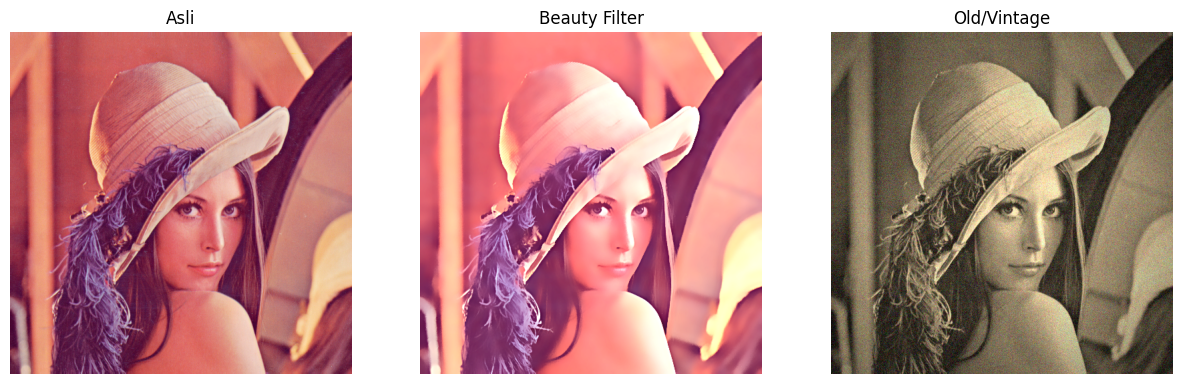

In [42]:
img = cv.imread("/content/drive/MyDrive/PCVK/Image/Lenna_(test_image).png")
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#Step 1: Smoothing kulit dengan bilateral filter
smooth = cv.bilateralFilter(img, d=15, sigmaColor=75, sigmaSpace=75)
#Step 2: Unsharp masking (pertajam mata/bibir)
gaussian = cv.GaussianBlur(smooth, (0,0), 3)
sharpened = cv.addWeighted (smooth, 1.5, gaussian, -0.5, 0)
# Step 3: Brightness & contrast
alpha = 1.2
# contrast
beta = 15
# brightness
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)
#2. Old/Vintage Filter
#Step 1: Sepia tone
sepia_kernel = np.array([[0.272, 0.534, 0.131],
                         [0.349, 0.686, 0.168],
                         [0.393, 0.769, 0.189]])
sepia = cv.transform(img, sepia_kernel)
sepia = np.clip (sepia, 0, 255).astype(np.uint8)
# Step 2: Vignette
rows, cols = img.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols*0.6)
kernel_y = cv.getGaussianKernel(rows, rows*0.6)
kernel = kernel_y* kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy (sepia)
for i in range(3):
  vignette[:,:,i] = vignette[:,:,i] * mask
# Step 3: Noise/Grain
noise= np.random.normal(0, 15, vignette.shape).astype (np.int16)
old_img = np.clip (vignette.astype(np.int16) + noise, 0, 255).astype (np.uint8)

show_side_by_side([img, beauty, old_img],
["Asli", "Beauty Filter", "Old/Vintage"])

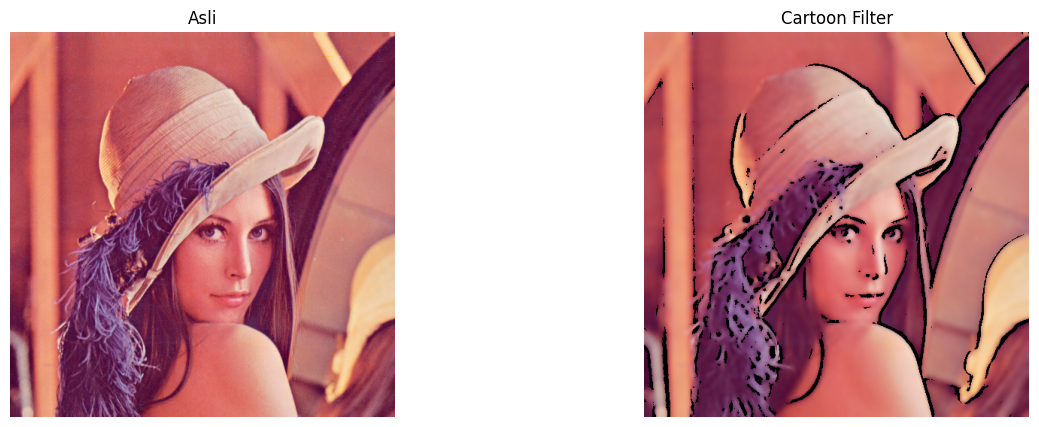

In [43]:
#Filter Anime / Cartoon
#Step 1: Edge detection (pakai median blur dulu agar gambar menjadi lebih halus)
img = cv.imread("/content/drive/MyDrive/PCVK/Image/Lenna_(test_image).png")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray_blur = cv.medianBlur(gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255,
                             cv.ADAPTIVE_THRESH_MEAN_C,
                             cv.THRESH_BINARY, 9, 9)
#Step 2: Bilateral filter untuk smoothing warna
color = cv.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)
#Step 3: Gabungkan (cartoonize)
cartoon = cv.bitwise_and(color, color, mask=edges)
# Tampilkan
show_side_by_side([img, cartoon], ["Asli", "Cartoon Filter"])

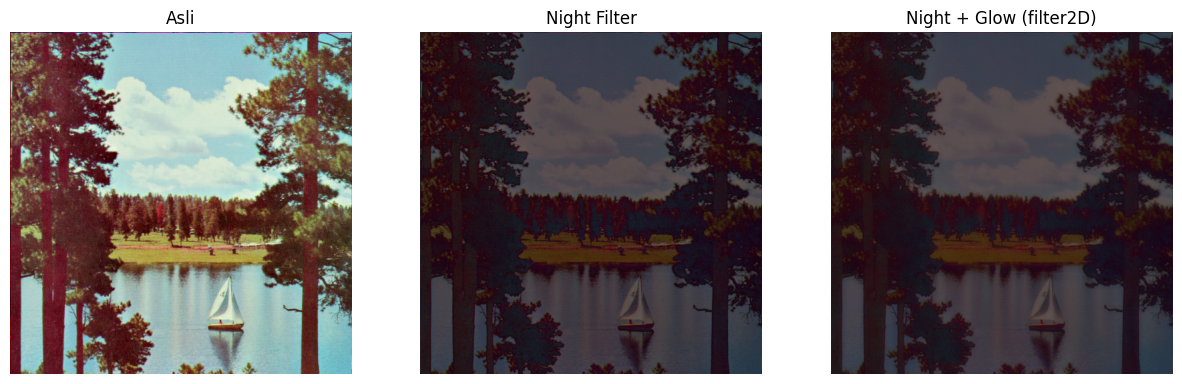

In [48]:
#Night Filter
img = cv.imread("/content/drive/MyDrive/PCVK/Image/sailboat.tiff")
#Step 1: Gelapkan (contrast turun, brightness negatif)
night = cv.convertScaleAbs(img, alpha=0.6, beta=-40)
#Step 2: Tambah bias biru
blue_tint = np.full_like (night, (50, 0, 100)) # BGR
night = cv.addWeighted(night, 0.8, blue_tint, 0.2, 0)
#Step 3: Efek glow di area terang dengan filter2D (blur kernel)
kernel = np.ones((15,15), np.float32) / 225
glow = cv.filter2D (night, -1, kernel)
# Kombinasikan asli + glow
night_glow = cv.addWeighted (night, 0.7, glow, 0.3, 0)
show_side_by_side([img, night, night_glow], ["Asli", "Night Filter", "Night + Glow (filter2D)"])

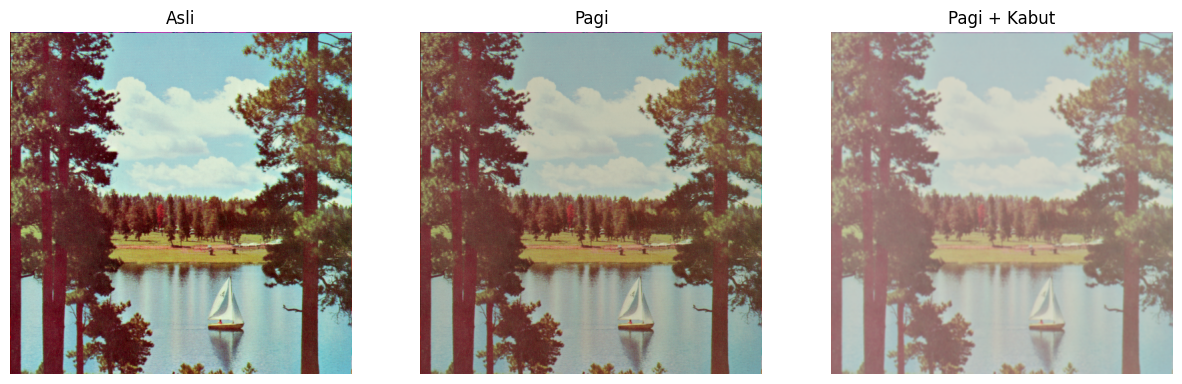

In [50]:
#Filter Suasana pagi dan Kabut
img = cv.imread("/content/drive/MyDrive/PCVK/Image/sailboat.tiff")
# Step 1: Kurangi kontras & cerahkan
alpha = 0.9 # contrast
beta = 20 # brightness
soft = cv.convertScaleAbs(img, alpha=alpha, beta=beta)
# Step 2: Tambahkan warm tone (kemerahan / oranye)
warm_tint = np.full_like(soft, (40, 70, 120)) # BGR
pagi = cv.addWeighted(soft, 0.8, warm_tint, 0.2, 0)
# Step 3: Tambahkan haze (kabut tipis) dengan filter2D
# Kernel blur Gaussian-Like untuk menciptakan efek kabut
kernel = cv.getGaussianKernel(3, 3)
kernel = kernel @ kernel.T # jadikan 2D kernel
kabut = cv.filter2D (pagi, -1, kernel)
# tambah Layer putih untuk kabut Lebih nyata
white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted(kabut, 0.7, white_layer, 0.3, 0)
show_side_by_side([img, pagi, kabut],
["Asli", "Pagi", "Pagi + Kabut"])